# ***Forecasting Hotel Reservation Cancelation to predict Length of Night Stay ***
## ***Dataset Description***
***This data collection comprises reservation details for a city hotel and a resort hotel, such as the date the reservation was made, the duration of the stay, the number of people, kids, and/or babies, and the number of parking spaces available, among other details***

## ***Goal***
***The primary objective of this study is to identify appropriate machine learning regression model to forecast length of night stays.***

## ***Objectives***
1. To analyze and understand the data by EDA
2. To conduct data preprocessing
3. To identify one suitable regression model for predicting length of night stay for a new input

---




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Time-series***

---



## ***Import Libraries***

---



In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## ***Read the data***

---



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv")

## ***Preprocessing***

---



### ***Better practice is to copy the data often before it undergoes any trandormation process***

---



In [ ]:
## Copy the dataset
data_cln= df.copy()

### ***Handling the Missing Data***

---



In [ ]:
#Missing Data
# Create new categories for both the agent and the company colum
data_cln['agent'] = pd.to_numeric(data_cln['agent'], errors='coerce')
data_cln['agent'] = data_cln['agent'].fillna(0).astype(int)

data_cln['company'] = pd.to_numeric(data_cln['company'], errors='coerce')
data_cln['company'] = data_cln['company'].fillna(0).astype(int)

# Changing children value of NULL to "0" and converting to integer type: 
data_cln['children'] = data_cln['children'].fillna(0).astype(int)
# Replacing null value for country feature with "unknown"
data_cln['country'] = data_cln['country'].fillna('Unknown')

In [ ]:
# Checking that no missing values remain:
data_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## ***Data Tranformation***

---



In [ ]:
#Create a new feature 'total_guests" by  merging adults,children and babies features
data_cln["total_guests"] = data_cln["adults"] + data_cln["children"] + data_cln["babies"]

#Map the month field
data_cln['arrival_date_month'] = data_cln['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str)

In [ ]:
#Copy the data before major transformation
data_confirmed = data_cln.copy()

In [ ]:
#Extract only confirmed booking data
data_conf_booking = data_confirmed[data_confirmed['is_canceled'] == 0]
data_conf_booking['adr_pp'] = data_conf_booking['adr']/(data_conf_booking['total_guests'])

# Create new categories for both the agent and the company colum
data_conf_booking['adr_pp'] = pd.to_numeric(data_conf_booking['adr_pp'], errors='coerce')
data_conf_booking['adr_pp'] = data_conf_booking['adr_pp'].fillna(0)

#Calculate the total number of stay 
data_conf_booking['total_nights'] = data_conf_booking['stays_in_weekend_nights']+ data_conf_booking['stays_in_week_nights']

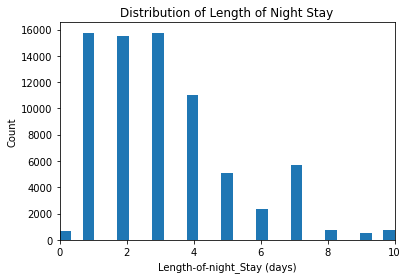

In [ ]:
# Plot LOS Distribution
plt.hist(data_conf_booking['total_nights'],bins=200)
plt.xlim(0, 10)
plt.title('Distribution of Length of Night Stay')
plt.ylabel('Count')
plt.xlabel('Length-of-night_Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show();

In [ ]:
data_imp_feature = data_conf_booking.copy()

## ***Data Handling***

---
1. Numerical
2. Categorical

---




In [ ]:
#get the catergorical column's position to apply Kprototypes
cat_col = [data_conf_booking.columns.get_loc(col) for col in list(data_conf_booking.select_dtypes('object').columns)]

print('Cateforical Columns           : {}'.format(list(data_conf_booking.select_dtypes('object').columns)))
print('Categorical Columns Position  : {}'.format(cat_col))

Cateforical Columns           : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Categorical Columns Position  : [0, 4, 12, 13, 14, 15, 19, 20, 22, 26, 30, 31]


In [ ]:
data_imp_cat = data_imp_feature.copy()

### ***Encode Categorical Data***

---



In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data_imp_cat['hotel'])
label1 = le.fit_transform(data_imp_cat['meal'])
label2 = le.fit_transform(data_imp_cat['country'])
label3 = le.fit_transform(data_imp_cat['market_segment'])
label4 = le.fit_transform(data_imp_cat['distribution_channel'])
label5 = le.fit_transform(data_imp_cat['reserved_room_type'])
label6 = le.fit_transform(data_imp_cat['assigned_room_type'])
label7 = le.fit_transform(data_imp_cat['deposit_type'])
label8 = le.fit_transform(data_imp_cat['customer_type'])
label9 = le.fit_transform(data_imp_cat['reservation_status'])
label10 = le.fit_transform(data_imp_cat['reservation_status_date'])
 
# printing label
label
label1
label2
label3
label4
label5
label6
label7
label8
label9
label10

# removing the column 'Purchased' from df
# as it is of no use now.
data_imp_cat.drop('hotel',  axis=1, inplace=True)
data_imp_cat.drop('meal',  axis=1, inplace=True)
data_imp_cat.drop('country',  axis=1, inplace=True)
data_imp_cat.drop('market_segment',  axis=1, inplace=True)
data_imp_cat.drop('distribution_channel',  axis=1, inplace=True)
data_imp_cat.drop('reserved_room_type',  axis=1, inplace=True)
data_imp_cat.drop('assigned_room_type',  axis=1, inplace=True)
data_imp_cat.drop('deposit_type',  axis=1, inplace=True)
data_imp_cat.drop('customer_type',  axis=1, inplace=True)
data_imp_cat.drop('reservation_status',  axis=1, inplace=True)
data_imp_cat.drop('reservation_status_date',  axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
#data_c['day'] = label
data_imp_cat['hotel'] = label
data_imp_cat['meal'] = label1
data_imp_cat['country'] = label2
data_imp_cat['market_segment'] =label3
data_imp_cat['distribution_channel'] =label4
data_imp_cat['reserved_room_type'] =label5
data_imp_cat['assigned_room_type'] = label6
data_imp_cat['deposit_type'] =label7
data_imp_cat['customer_type']=label8
data_imp_cat['reservation_status']=label9
data_imp_cat['reservation_status_date']=label10
 
# printing Dataframe
data_imp_cat

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,adr_pp,total_nights,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,342,2015,7,27,1,0,0,2,0,0,0,0,0,3,0,0,0,0.00,0,0,2,0.000000,0,1,0,125,3,1,2,2,0,2,0,0
1,0,737,2015,7,27,1,0,0,2,0,0,0,0,0,4,0,0,0,0.00,0,0,2,0.000000,0,1,0,125,3,1,2,2,0,2,0,0
2,0,7,2015,7,27,1,0,1,1,0,0,0,0,0,0,0,0,0,75.00,0,0,1,75.000000,1,1,0,57,3,1,0,2,0,2,0,1
3,0,13,2015,7,27,1,0,1,1,0,0,0,0,0,0,304,0,0,75.00,0,0,1,75.000000,1,1,0,57,2,0,0,0,0,2,0,1
4,0,14,2015,7,27,1,0,2,2,0,0,0,0,0,0,240,0,0,98.00,0,1,2,49.000000,2,1,0,57,6,3,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,0,0,0,0,0,394,0,0,96.14,0,0,2,48.070000,7,0,0,15,5,3,0,0,0,2,0,798
119386,0,102,2017,8,35,31,2,5,3,0,0,0,0,0,0,9,0,0,225.43,0,2,3,75.143333,7,0,0,54,6,3,4,4,0,2,0,799
119387,0,34,2017,8,35,31,2,5,2,0,0,0,0,0,0,9,0,0,157.71,0,4,2,78.855000,7,0,0,42,6,3,3,3,0,2,0,799
119388,0,109,2017,8,35,31,2,5,2,0,0,0,0,0,0,89,0,0,104.40,0,0,2,52.200000,7,0,0,57,6,3,0,0,0,2,0,799


In [ ]:
data_imp_num = data_imp_cat.copy()

### ***Normalize Numerical Data***

---



In [ ]:
# apply normalization techniques on Column 1
lead_time = 'lead_time'
data_imp_num[lead_time] = data_imp_num[lead_time] /data_imp_num[lead_time].abs().max()
arrival_date_week_number = 'arrival_date_week_number'
data_imp_num[arrival_date_week_number] = data_imp_num[arrival_date_week_number] /data_imp_num[arrival_date_week_number].abs().max()
arrival_date_day_of_month = 'arrival_date_day_of_month'
data_imp_num[arrival_date_day_of_month] = data_imp_num[arrival_date_day_of_month] /data_imp_num[arrival_date_day_of_month].abs().max()
stays_in_weekend_nights = 'stays_in_weekend_nights'
data_imp_num[stays_in_weekend_nights] = data_imp_num[stays_in_weekend_nights] /data_imp_num[stays_in_weekend_nights].abs().max()
stays_in_week_nights = 'stays_in_week_nights'
data_imp_num[stays_in_week_nights] = data_imp_num[stays_in_week_nights] /data_imp_num[stays_in_week_nights].abs().max()
adults = 'adults'
data_imp_num[adults] = data_imp_num[adults] /data_imp_num[adults].abs().max()
children = 'children'
data_imp_num[children] = data_imp_num[children] /data_imp_num[children].abs().max()
babies = 'babies'
data_imp_num[babies] =data_imp_num[babies] /data_imp_num[babies].abs().max()
is_repeated_guest = 'is_repeated_guest'
data_imp_num[is_repeated_guest] = data_imp_num[is_repeated_guest] /data_imp_num[is_repeated_guest].abs().max()
previous_cancellations = 'previous_cancellations'
data_imp_num[previous_cancellations] = data_imp_num[previous_cancellations] /data_imp_num[previous_cancellations].abs().max()
previous_bookings_not_canceled = 'previous_bookings_not_canceled'
data_imp_num[previous_bookings_not_canceled] = data_imp_num[previous_bookings_not_canceled] /data_imp_num[previous_bookings_not_canceled].abs().max()
agent = 'agent'
data_imp_num[agent] = data_imp_num[agent] /data_imp_num[agent].abs().max()
company = 'company'
data_imp_num[company] = data_imp_num[company] /data_imp_num[company].abs().max()
adr = 'adr'
data_imp_num[adr] = data_imp_num[adr] /data_imp_num[adr].abs().max()
adr_pp = 'adr_pp'
data_imp_num[adr_pp] = data_imp_num[adr_pp] /data_imp_num[adr_pp].abs().max()
arrival_date_year = 'arrival_date_year'
data_imp_num[arrival_date_year] = data_imp_num[arrival_date_year] /data_imp_num[arrival_date_year].abs().max()
required_car_parking_spaces = 'required_car_parking_spaces'
data_imp_num[required_car_parking_spaces] = data_imp_num[required_car_parking_spaces] /data_imp_num[required_car_parking_spaces].abs().max()
total_of_special_requests = 'total_of_special_requests'
data_imp_num[total_of_special_requests] = data_imp_num[total_of_special_requests] /data_imp_num[total_of_special_requests].abs().max()
total_guests = 'total_guests'
data_imp_num[total_guests] = data_imp_num[total_guests] /data_imp_num[total_guests].abs().max()
total_nights = 'total_nights'
data_imp_num[total_nights] = data_imp_num[total_nights] /data_imp_num[total_nights].abs().max()
# view normalized data
display(data_imp_num)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,adr_pp,total_nights,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,0.464043,0.999008,7,0.509434,0.032258,0.000000,0.00,0.50,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.0,0,0.000000,0.0,0.0,0.166667,0.0,0.000000,1,0,125,3,1,2,2,0,2,0,0
1,0,1.000000,0.999008,7,0.509434,0.032258,0.000000,0.00,0.50,0.0,0.0,0.0,0.0,0.0,4,0.000000,0.0,0,0.000000,0.0,0.0,0.166667,0.0,0.000000,1,0,125,3,1,2,2,0,2,0,0
2,0,0.009498,0.999008,7,0.509434,0.032258,0.000000,0.02,0.25,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0,0.147059,0.0,0.0,0.083333,0.0,0.014493,1,0,57,3,1,0,2,0,2,0,1
3,0,0.017639,0.999008,7,0.509434,0.032258,0.000000,0.02,0.25,0.0,0.0,0.0,0.0,0.0,0,0.568224,0.0,0,0.147059,0.0,0.0,0.083333,0.0,0.014493,1,0,57,2,0,0,0,0,2,0,1
4,0,0.018996,0.999008,7,0.509434,0.032258,0.000000,0.04,0.50,0.0,0.0,0.0,0.0,0.0,0,0.448598,0.0,0,0.192157,0.0,0.2,0.166667,0.0,0.028986,1,0,57,6,3,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.031208,1.000000,8,0.660377,0.967742,0.105263,0.10,0.50,0.0,0.0,0.0,0.0,0.0,0,0.736449,0.0,0,0.188510,0.0,0.0,0.166667,0.0,0.101449,0,0,15,5,3,0,0,0,2,0,798
119386,0,0.138399,1.000000,8,0.660377,1.000000,0.105263,0.10,0.75,0.0,0.0,0.0,0.0,0.0,0,0.016822,0.0,0,0.442020,0.0,0.4,0.250000,0.0,0.101449,0,0,54,6,3,4,4,0,2,0,799
119387,0,0.046133,1.000000,8,0.660377,1.000000,0.105263,0.10,0.50,0.0,0.0,0.0,0.0,0.0,0,0.016822,0.0,0,0.309235,0.0,0.8,0.166667,0.0,0.101449,0,0,42,6,3,3,3,0,2,0,799
119388,0,0.147897,1.000000,8,0.660377,1.000000,0.105263,0.10,0.50,0.0,0.0,0.0,0.0,0.0,0,0.166355,0.0,0,0.204706,0.0,0.0,0.166667,0.0,0.101449,0,0,57,6,3,0,0,0,2,0,799


In [ ]:
data_model.dtypes

lead_time                         float64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number          float64
arrival_date_day_of_month         float64
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
booking_changes                     int64
agent                             float64
company                           float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces       float64
total_of_special_requests         float64
total_guests                      float64
adr_pp                            float64
total_nights                      float64
hotel                               int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
reserved_room_type                

## ***Model Building***

---



In [ ]:
data_imp_num = data_imp_num.drop(['is_canceled','babies','children','adults','stays_in_week_nights','stays_in_weekend_nights','adr_pp'], axis=1)

In [ ]:
data_model = data_imp_num.copy()

In [ ]:
data_model

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,adr_pp,total_nights,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0.464043,0.999008,July,0.509434,0.032258,0.0,0.0,0.0,3,0.000000,0.0,0,0.000000,0.0,0.0,0.166667,NaN,0.000000,1,0,125,3,1,2,2,0,2,0,0
1,1.000000,0.999008,July,0.509434,0.032258,0.0,0.0,0.0,4,0.000000,0.0,0,0.000000,0.0,0.0,0.166667,NaN,0.000000,1,0,125,3,1,2,2,0,2,0,0
2,0.009498,0.999008,July,0.509434,0.032258,0.0,0.0,0.0,0,0.000000,0.0,0,0.147059,0.0,0.0,0.083333,NaN,0.014493,1,0,57,3,1,0,2,0,2,0,1
3,0.017639,0.999008,July,0.509434,0.032258,0.0,0.0,0.0,0,0.568224,0.0,0,0.147059,0.0,0.0,0.083333,NaN,0.014493,1,0,57,2,0,0,0,0,2,0,1
4,0.018996,0.999008,July,0.509434,0.032258,0.0,0.0,0.0,0,0.448598,0.0,0,0.192157,0.0,0.2,0.166667,NaN,0.028986,1,0,57,6,3,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,1.000000,August,0.660377,0.967742,0.0,0.0,0.0,0,0.736449,0.0,0,0.188510,0.0,0.0,0.166667,NaN,0.101449,0,0,15,5,3,0,0,0,2,0,798
119386,0.138399,1.000000,August,0.660377,1.000000,0.0,0.0,0.0,0,0.016822,0.0,0,0.442020,0.0,0.4,0.250000,NaN,0.101449,0,0,54,6,3,4,4,0,2,0,799
119387,0.046133,1.000000,August,0.660377,1.000000,0.0,0.0,0.0,0,0.016822,0.0,0,0.309235,0.0,0.8,0.166667,NaN,0.101449,0,0,42,6,3,3,3,0,2,0,799
119388,0.147897,1.000000,August,0.660377,1.000000,0.0,0.0,0.0,0,0.166355,0.0,0,0.204706,0.0,0.0,0.166667,NaN,0.101449,0,0,57,6,3,0,0,0,2,0,799


### ***Data Partition***

---



In [ ]:
#Select input and target Features
x = data_model.drop(['total_nights'], axis=1)
y = data_model['total_nights']

In [ ]:
# Split into train 80% and test 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 60132 samples.
Testing set has 15034 samples.


### ***Regression Model implementation and Comparision***

---
*To implement the prediction model, I consider total_stay as a  target variable and features into training and test sets using the scikit-learn train_test_split function. Using the training set to fit with 5 different regression models*

---




In [ ]:
  # Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(x_test)

    # Grab model name and store results associated with model
    name = str(model).split("(")[0]
    results[name] = np.sqrt(mean_squared_error(y_test, y_test_preds))
    print('{} done.'.format(name))
    print("RMSE",np.sqrt(mean_squared_error(y_test, y_test_preds)))
  

SGDRegressor done.
RMSE 25271894210917.832
GradientBoostingRegressor done.
RMSE 0.027786205220436996
LinearRegression done.
RMSE 0.007864000896524127
KNeighborsRegressor done.
RMSE 0.030948043875763984
RandomForestRegressor done.
RMSE 0.024105463549669633


In [ ]:
print(accuracy_score( x_test, y_test_preds))

In [ ]:
from sklearn.metrics import mean_absolute_error
for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(x_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]
    #results[name] = np.sqrt(mean_squared_error(y_test, y_test_preds))
    results[name] = mean_absolute_error(y_test, y_test_preds)
    print('{} done.'.format(name))
    print("MAE",mean_absolute_error(y_test,y_test_preds))


SGDRegressor done.
MAE 23102949949665.27
GradientBoostingRegressor done.
MAE 0.018755800851620315
LinearRegression done.
MAE 0.00602441372173734
KNeighborsRegressor done.
MAE 0.019041476999959516
RandomForestRegressor done.
MAE 0.013798019175858406


In [ ]:
# MAE score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
#ax.set_xlabel('R-squared score')
ax.set_xlabel('RMSE')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')

*Linear regression performed well versus the other regression model with MAE scores, so next I have planned to focus on refining this particular model. The GradientBoostingRegressor*

---



## ***Model Refinement on Best Performed Model***

---
To refine the Linear Regressor model, GridSearchCV function have been used with scikit-learn to test out various parameters

---



In [ ]:
# Linear Regression will be used as the LOS prediction model
reg_model = LinearRegression()   
reg_model.fit(x_train, y_train)
y_test_preds = reg_model.predict(x_test)
r2_not_refined = r2_score(y_test, y_test_preds)
MAE_not_refined = mean_absolute_error(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined)) 
print("MAE : {:2f}".format(MAE_not_refined)) 

R2 score is: 0.952629
MAE : 0.006024


## ***Retrain the Best Model***

---



In [ ]:
# Split into train 80% and test 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 42)

# Parameters selection by cross-validation
tuned_parameters = [{'n_estimators': [200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad']}]

# create and fit a ridge regression model, testing each alpha
reg_model = LinearRegression()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(x_train, y_train)
reg_model_optimized = grid.estimator

# summarize the results of the grid search
print(grid.best_score_)
print(grid.estimator)

In [ ]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}
from sklearn import linear_model
#initialising Ridge() function
ridge = linear_model.Ridge(alpha=0.5)
# defining cross validation folds as 5
folds = 5

In [ ]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Split into train 80% and test 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 42)
# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=0.5),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
y_test_preds = reg_model_optimized.predict(x_test)
mae_optimized = mean_absolute_error(y_test, y_test_preds)
print("Optimized vmae score is: {:2f}".format(mae_optimized)) 

Optimized vmae score is: 0.022195


In [ ]:
print('Model refinement improved MAE score by {:.4f}'.format(mae_optimized-MAE_not_refined))

Model refinement improved MAE score by 0.0162


## ***Feature Selection using Best Model***

---



In [ ]:
# Loading neccesary packages for modelling and feature selection
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select= 7)
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False False False False False
  True False False False False False False False False False False False
 False False  True]
[ 1  1  1  1  1 17  3  2 14  7 11 19  1  6  8  4 10 18 20 13 12 16 15  5
  9 21  1]


*Here I take a linear regression model with 7 features and RFE has given the feature rating as above, however the selection of the number '7' is random. Now I am planning to find the optimal number of features for the highest accuracy.* .

---



In [ ]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.951322


*From the above process, the optimum number of features is 12. So, I am taking 12 features to RFE and get the final set of features given by RFE method, as follows:*

---



In [ ]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select= 12)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'previous_cancellations', 'previous_bookings_not_canceled', 'adr',
       'required_car_parking_spaces', 'total_guests', 'deposit_type',
       'reservation_status_date'],
      dtype='object')


In [ ]:
feature_imp = pd.DataFrame(selected_features_rfe).reset_index()
feature_imp

,index,0
0,0,lead_time
1,1,arrival_date_year
2,2,arrival_date_month
3,3,arrival_date_week_number
4,4,arrival_date_day_of_month
5,5,previous_cancellations
6,6,previous_bookings_not_canceled
7,7,adr
8,8,required_car_parking_spaces
9,9,total_guests


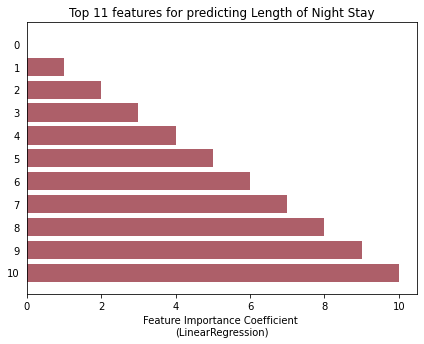

In [ ]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,11)
ax.barh(ind, feature_imp['index'].values[0:11], 
        align='center', color='#a44e59', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:11].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 11 features for predicting Length of Night Stay")
ax.set_xlabel('Feature Importance Coefficient \n(LinearRegression)')
plt.gca().invert_yaxis()


In [ ]:
# Total Length of Stay -  metrics for later comparison
actual_mean_los = data_conf_booking['total_nights'].mean() 
actual_median_los = data_conf_booking['total_nights'].median() 

print(actual_mean_los)
print(actual_median_los)

3.3930234414495914
3.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test, y_test_preds,reg_model):
    if max(y_test) >= max(y_test_preds):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_test_preds))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_test_preds)), y_test_preds, color='red')
    plt.title(reg_model)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_test_preds, "test")

In [ ]:
y_test_preds

array([0.02890299, 0.05817205, 0.04759185, ..., 0.04305351, 0.06766611,
       0.04674913])

In [ ]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.184505,0.007941,0.043656,0.006447,0.0001,{'alpha': 0.0001},-0.022449,-0.022127,-0.022530,-0.022423,-0.022623,-0.022431,0.000167,1,-0.022403,-0.022494,-0.022364,-0.022410,-0.022382,-0.022411,0.000045
1,0.179059,0.001832,0.040720,0.000548,0.001,{'alpha': 0.001},-0.022538,-0.022216,-0.022618,-0.022511,-0.022711,-0.022519,0.000167,2,-0.022492,-0.022585,-0.022451,-0.022497,-0.022469,-0.022499,0.000046
2,0.179536,0.003223,0.040130,0.000338,0.01,{'alpha': 0.01},-0.022547,-0.022225,-0.022627,-0.022520,-0.022720,-0.022528,0.000167,3,-0.022501,-0.022594,-0.022460,-0.022506,-0.022478,-0.022508,0.000046
3,0.175271,0.000916,0.040280,0.000417,0.05,{'alpha': 0.05},-0.022548,-0.022226,-0.022627,-0.022521,-0.022721,-0.022529,0.000167,4,-0.022502,-0.022595,-0.022461,-0.022507,-0.022479,-0.022509,0.000046
4,0.175779,0.001912,0.040248,0.000110,0.1,{'alpha': 0.1},-0.022548,-0.022227,-0.022628,-0.022521,-0.022721,-0.022529,0.000166,5,-0.022502,-0.022595,-0.022461,-0.022507,-0.022480,-0.022509,0.000046


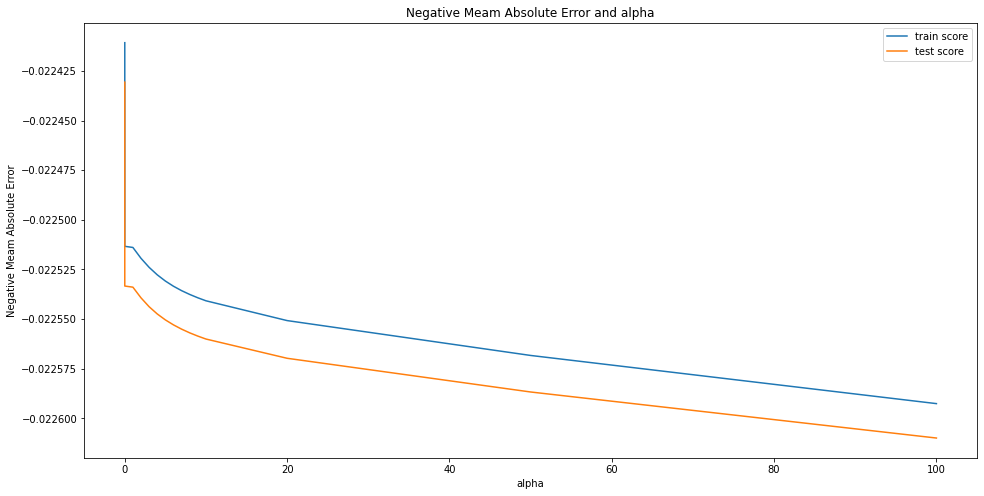

In [ ]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

## ***Prediction***

---



# ***CONCLUSION***

---

Now, I can predict the length of a night stay in hotel for a new data using data with the highly important features. Such a model has the potential to profoundly improve hotel management.
The most surprising aspect of this work was how the lead_time played a more important role than age when predicting the length-of-stay. By far, the most challenging aspect of this project was the feature engineering.  Given that the lead_time have such a strong feature importance, it would be worth evaluating wwhich would yield a better prediction model. My theory is that the prediction model would become more accurate (lower MAE) with this optimization.

---

